Sentiment Analysis
Dataset: IMDB Dataset
Link: http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

# Phase 1: Cleaning 

Read the labelled data from respective folders (pos & neg) and store in data-frames (eg: train_df & test_df) with suitable structure 
Hint: columns = [review, label]

In [1]:
import pandas as pd
import numpy as np
import glob

print("Training Data Loading....")
#Creating empty dataframe for loading training set
train_df=pd.DataFrame(np.nan,index=[],columns=['review','label'])

#Insering 0 for negative label
files = glob.glob("Z:/IIITB/Analytics_vidya/Material_Code/Week 12- Capstone Project/aclImdb/train/neg/*.txt")
for fle in files:
    # open the file and then call .read() to get the text 
    with open(fle) as f:
        text = f.read()
        train_df.loc[len(train_df)]=[text,int(0)]
print(train_df.head(5))

#Similarly inserting 1 for positive reviews
files = glob.glob("Z:/IIITB/Analytics_vidya/Material_Code/Week 12- Capstone Project/aclImdb/train/pos/*.txt")
for fle in files:
    # open the file and then call .read() to get the text 
    with open(fle) as f:
        text = f.read()
        train_df.loc[len(train_df)]=[text,int(1)]
print(train_df.tail(5))

print("Test Data Loading....")
#Loading test dataset
test_df=pd.DataFrame(np.nan,index=[],columns=['review','label'])
files = glob.glob("Z:/IIITB/Analytics_vidya/Material_Code/Week 12- Capstone Project/aclImdb/test/neg/*.txt")
for fle in files:
    # open the file and then call .read() to get the text 
    with open(fle) as f:
        text = f.read()
        test_df.loc[len(test_df)]=[text,int(0)]
print(test_df.head(5))
files = glob.glob("Z:/IIITB/Analytics_vidya/Material_Code/Week 12- Capstone Project/aclImdb/test/pos/*.txt")
for fle in files:
    # open the file and then call .read() to get the text 
    with open(fle) as f:
        text = f.read()
        test_df.loc[len(test_df)]=[text,int(1)]
print(test_df.tail(5))

Training Data Loading....
                                              review  label
0  Story of a man who has unnatural feelings for ...    0.0
1  Airport '77 starts as a brand new luxury 747 p...    0.0
2  This film lacked something I couldn't put my f...    0.0
3  Sorry everyone,,, I know this is supposed to b...    0.0
4  When I was little my parents took me along to ...    0.0
                                                  review  label
24995  Seeing as the vote average was pretty low, and...    1.0
24996  The plot had some wretched, unbelievable twist...    1.0
24997  I am amazed at how this movie(and most others ...    1.0
24998  A Christmas Together actually came before my t...    1.0
24999  Working-class romantic drama from director Mar...    1.0
Test Data Loading....
                                              review  label
0  Once again Mr. Costner has dragged out a movie...    0.0
1  This is an example of why the majority of acti...    0.0
2  First of all I hate those

Remove stop words from the data. Also, apply Stemming and Lemmatization 

In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

#nltk.download('stopwords') for downloading stopwords file
stop_words = set(stopwords.words("english"))  # load stopwords

#This function converts string to lowercase, removes punctuation, removes stop words and tokenize
def tokenize(sen):
    sen=' '.join(s for s in sen.split() if not any(c.isdigit() for c in s))
    sen=''.join(sen).lower().decode("utf-8")
    sen=word_tokenize(sen)
    sen =filter(lambda x: x not in stop_words, sen)
    sen=filter(lambda x: x not in string.punctuation, sen)
    return sen

train_df['review']=train_df['review'].apply(tokenize)
print(train_df.head(5))

                                              review  label
0  [story, man, unnatural, feelings, pig, starts,...    0.0
1  [airport, starts, brand, new, luxury, plane, l...    0.0
2  [film, lacked, something, could, n't, put, fin...    0.0
3  [sorry, everyone, know, supposed, ``, art, '',...    0.0
4  [little, parents, took, along, theater, see, i...    0.0


In [3]:

def stem(sen):
    sen=map(lambda x: lemmatizer.lemmatize(x), sen)
    sen=map(lambda x: ps.stem(x), sen)
    return sen
train_df['review']=train_df['review'].apply(stem)
print(train_df.head(10))


                                              review  label
0  [stori, man, unnatur, feel, pig, start, open, ...    0.0
1  [airport, start, brand, new, luxuri, plane, lo...    0.0
2  [film, lack, someth, could, n't, put, finger, ...    0.0
3  [sorri, everyon, know, suppos, ``, art, '', fi...    0.0
4  [littl, parent, took, along, theater, see, int...    0.0
5  [``, appear, mani, critic, find, idea, woodi, ...    0.0
6  [second, attempt, new, york, intellectu, le, y...    0.0
7  [n't, know, blame, timid, writer, clueless, di...    0.0
8  [film, mediocr, best, angi, harmon, funni, bag...    0.0
9  [film, bad, way, say, stori, weak, outdat, esp...    0.0


# Phase 2 Exploration 


For labelled data, find the most common words associated with each category (positive & negative)

In [4]:
# Top negative words
posts=train_df.loc[(train_df.label==0,'review')]
#print(posts.iloc[24999])
#print posts
from collections import defaultdict
freq_dict_neg = defaultdict(int)

for tokens in posts:
    for token in tokens:
        freq_dict_neg[token] += 1
#top = sorted(freq_dict, key=freq_dict.get, reverse=True)
for key in sorted(freq_dict_neg,key=freq_dict_neg.get, reverse=True)[:50]:
    print "%s: %s" % (key, freq_dict_neg[key])

br: 52343
's: 29077
movi: 27994
film: 22052
n't: 19956
``: 16967
'': 16712
one: 13025
like: 12057
make: 7849
even: 7752
would: 7669
get: 7613
good: 7293
watch: 7271
time: 7268
bad: 7148
...: 7139
charact: 6962
see: 6563
realli: 6228
go: 6171
could: 5690
look: 5665
stori: 5485
scene: 5456
act: 5144
much: 4990
peopl: 4786
end: 4783
thing: 4633
think: 4586
made: 4354
first: 4245
show: 4184
plot: 4157
say: 4156
way: 4128
seem: 4045
well: 3909
know: 3844
tri: 3821
want: 3672
also: 3580
play: 3567
actor: 3489
come: 3278
better: 3261
never: 3234
seen: 3200


In [5]:
# Top positive words
posts=train_df.loc[(train_df.label==1,'review')]

from collections import defaultdict
freq_dict_pos = defaultdict(int)

for tokens in posts:
    for token in tokens:
        freq_dict_pos[token] += 1
#top = sorted(freq_dict, key=freq_dict.get, reverse=True)
for key in sorted(freq_dict_pos,key=freq_dict_pos.get, reverse=True)[:50]:
    print "%s: %s" % (key, freq_dict_pos[key])

br: 48848
's: 30983
film: 24551
movi: 21965
'': 15743
``: 15466
one: 13768
n't: 13418
like: 10182
time: 7941
good: 7553
see: 7311
stori: 7235
charact: 6905
make: 6677
get: 6427
watch: 6406
great: 6384
love: 5971
well: 5906
would: 5712
also: 5512
show: 5485
realli: 5453
go: 5309
even: 5092
play: 5011
scene: 4846
...: 4829
life: 4749
first: 4632
much: 4617
peopl: 4484
end: 4466
way: 4383
think: 4255
best: 4240
look: 4046
work: 3791
year: 3762
mani: 3762
could: 3676
made: 3659
two: 3608
perform: 3558
know: 3557
thing: 3443
take: 3385
seen: 3364
come: 3355


Discover the lowest frequency and highest frequency words

In [6]:
posts=train_df['review']

from collections import defaultdict
freq_dict = defaultdict(int)

for tokens in posts:
    for token in tokens:
        freq_dict[token] += 1
top = sorted(freq_dict, key=freq_dict.get, reverse=True)
print "%s: %s" % (top[0], freq_dict[top[0]])
print "%s: %s" % (top[len(top)-1], freq_dict[top[len(top)-1]])

br: 101191
boo': 1


Classify each words along with its frequency with the review it is connected to and also merging the same with that particular movie. 

# Phase 3 Visualization 
Create a wordcloud with positive and negative words after cleansing
Visualise the positive and negative words distribution (Hint: Histogram)
Visualise the movies with the high frequency keywords (Hint: Scatter plot)

In [ ]:
# WordClouds: negative and positive
from wordcloud import WordCloud
neg_list = train_df[train_df["label"] == 0]["review"].unique().tolist()
neg = " ".join(neg_list)
neg_wordcloud = WordCloud().generate(neg)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.imshow(neg_wordcloud)
plt.show()

from wordcloud import WordCloud
pos_list = train_df[train_df["label"] == 1]["review"].unique().tolist()
pos = " ".join(neg_list)
pos_wordcloud = WordCloud().generate(pos)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.imshow(neg_wordcloud)
plt.show()

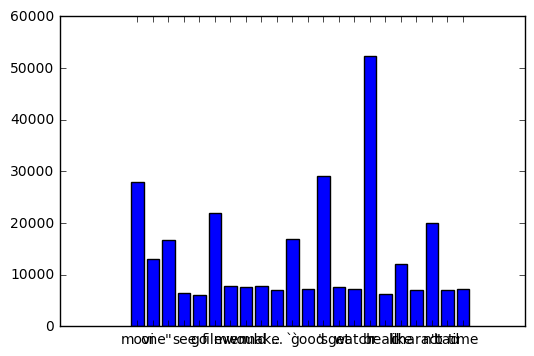

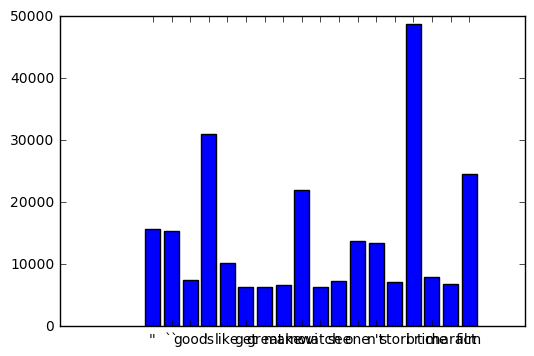

In [7]:
# Histogram: negative and positive

import matplotlib.pyplot as plt
top_neg=dict((key, value) for key, value in freq_dict_neg.items() if value > 6000)
plt.bar(range(len(top_neg)), top_neg.values(), align='center')
plt.xticks(range(len(top_neg)), top_neg.keys())
plt.show()

top_pos=dict((key, value) for key, value in freq_dict_pos.items() if value > 6000)
plt.bar(range(len(top_pos)), top_pos.values(), align='center')
plt.xticks(range(len(top_pos)), top_pos.keys())
plt.show()

# Phase 4 Hypothesis creation and testing

Create Hypothesis involving relationships between dependent and independent variables using parametric/non parametric tests for various machine learning algorithms such as k-means clustering,  classification algorithms .

# Phase 5 Model Building

Supervised Learning: Build a sentiment analysis model to predict positive and negative classes

In [8]:
#Merge back
def merge_token(sen):
    sen=' '.join(s for s in sen)
    return sen

train_df_test=train_df['review'].apply(merge_token)
print(train_df_test.head(5))

0    stori man unnatur feel pig start open scene te...
1    airport start brand new luxuri plane load valu...
2    film lack someth could n't put finger first ch...
3    sorri everyon know suppos `` art '' film wow h...
4    littl parent took along theater see interior o...
Name: review, dtype: object


In [9]:
#using numpy create count vectors for the text data using bag of words
from sklearn.feature_extraction.text import CountVectorizer

# create an instance
count_vect = CountVectorizer()
count_vect.fit(train_df_test.tolist())
X = count_vect.transform(train_df_test)


In [10]:
#fit the naive bayes model with above vectors and compare the accuracy with existing model
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, train_df['label'], test_size=0.25, random_state=0)
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [11]:
predictions = clf.predict(X_test)
predictions.shape
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.84784000000000004

Unsupervised Learning: Build a clustering model consisting of 2 clusters based on positive and negative reviews 

In [ ]:
from sklearn.cluster import KMeans
y=train_df['label'].values
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
import matplotlib.pyplot as plt
%matplotlib inline
colors = ['red', 'blue']
pred_colors = [colors[label] for label in kmeans.labels_]
X_nz=X.nonzero()

plt.scatter(X_nz[1], X.data, c=pred_colors)
plt.title('KMeans clusters')

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df_test)  

In [13]:
feature_names = tfidf_vectorizer.get_feature_names()

In [16]:
from sklearn.cluster import KMeans  
num_clusters = 2  
km = KMeans(n_clusters=num_clusters)  
km.fit(tfidf_matrix)  
clusters = km.labels_.tolist() 

In [23]:
from sklearn.metrics import accuracy_score
score = accuracy_score(train_df['label'],clusters)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.523520
